In [1]:
#Loading relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
#Retrieving data 
df = pd.read_csv("NFWBS_PUF_2016_data.csv")

In [3]:
#Getting an initial look at the data 
df.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


In [4]:
df.shape

(6394, 217)

## Data Cleaning

In [5]:
#Filtering out columns of interest
df=df[['PPINCIMP','EMPLOY','FWBscore', 'FSscore','HHEDUC','HEALTH','PRODHAVE_1','PRODHAVE_2','PRODHAVE_3','PRODHAVE_4','PRODHAVE_5','PRODHAVE_6','PRODHAVE_7','PRODHAVE_8']]


In [6]:
#Relabeling columns for easy comprehension
df.rename(columns={'PPINCIMP':'income',
                   'FWBscore':'financial_wellbeing',
                   'FSscore':'financial_skill',
                          'EMPLOY':'employment',
                          'PRODHAVE_1':'savings_account',
                           'PRODHAVE_2':'life_insurance',
                           'PRODHAVE_3':'health_insurance',
                           'PRODHAVE_4':'retirement_account',
                           'PRODHAVE_5':'pension',
                           'PRODHAVE_6': 'investment',
                           'PRODHAVE_7':'education_saving',
                           'PRODHAVE_8':'student_loan',
                           'HEALTH': 'health',
                            'HHEDUC': 'education'}, 
                 inplace=True)

df.head()

,income,employment,financial_wellbeing,financial_skill,education,health,savings_account,life_insurance,health_insurance,retirement_account,pension,investment,education_saving,student_loan
0,7,8,55,44,4,2,1,1,1,1,1,0,0,0
1,6,2,51,43,2,3,1,0,1,0,0,0,0,0
2,6,2,49,42,3,3,1,1,0,1,1,0,0,0
3,8,99,49,42,-1,-1,0,0,0,0,0,0,0,0
4,7,2,49,42,2,3,1,0,0,1,0,0,0,0


In [7]:
#Checking the number of junk values 
print((df == -1).sum())
print((df.financial_wellbeing == -4).sum())
print((df.employment == 99).sum())


income                  0
employment              0
financial_wellbeing     4
financial_skill         8
education              59
health                 53
savings_account         0
life_insurance          0
health_insurance        0
retirement_account      0
pension                 0
investment              0
education_saving        0
student_loan            0
dtype: int64
1
116


In [8]:
#Removing rows with junk values
df = df[(df != -1).all(axis=1)]
df = df[df.financial_wellbeing != -4]
df = df[df.employment != 99]

In [9]:
#Relabeling categorical variables 
df = df.replace({"employment":{
  1: "Self-employed",
  2: "Work full-time for an employer or the military",
  3: "Work part-time for an employer or the military",
  4: "Homemaker",
  5: "Full-time student",
  6: "Permanently sick, disabled or unable to work",
  7: "Unemployed or temporarily laid off",
  8: "Retired",
  99: "Refused"
},
"education":{
  1: "Less than high school",
  2: "High school degree/GED",
  3: "Some college/Associate",
  4: "Bachelors degree",
  5: "Graduate/professional degree"
},
"income":{
  1: 20000,
  2: 25000,
  3: 35000,
  4: 45000,
  5: 55000,
  6: 67500,
  7: 87500,
  8: 125000,
  9: 200000
}})

df.head()

,income,employment,financial_wellbeing,financial_skill,education,health,savings_account,life_insurance,health_insurance,retirement_account,pension,investment,education_saving,student_loan
0,87500,Retired,55,44,Bachelors degree,2,1,1,1,1,1,0,0,0
1,67500,Work full-time for an employer or the military,51,43,High school degree/GED,3,1,0,1,0,0,0,0,0
2,67500,Work full-time for an employer or the military,49,42,Some college/Associate,3,1,1,0,1,1,0,0,0
4,87500,Work full-time for an employer or the military,49,42,High school degree/GED,3,1,0,0,1,0,0,0,0
5,87500,Work full-time for an employer or the military,67,57,Bachelors degree,5,1,1,1,1,0,0,0,1


## Exploratory Data Analysis

In [10]:
#Seperating numerical and categorical values
df_num = df[['income', 'health','financial_skill','financial_wellbeing',]]
df_cat = df[['education', 'employment','savings_account','life_insurance','health_insurance','retirement_account','pension','investment','education_saving','student_loan']]

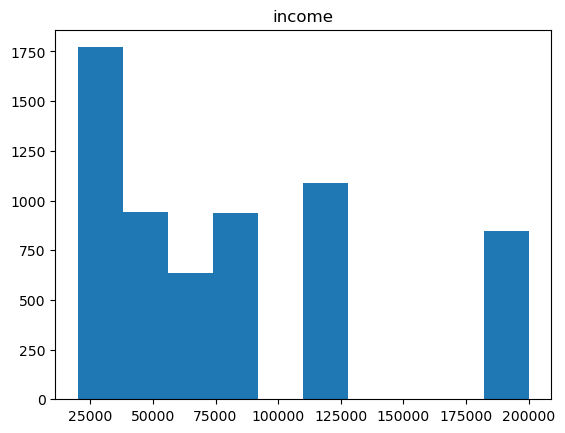

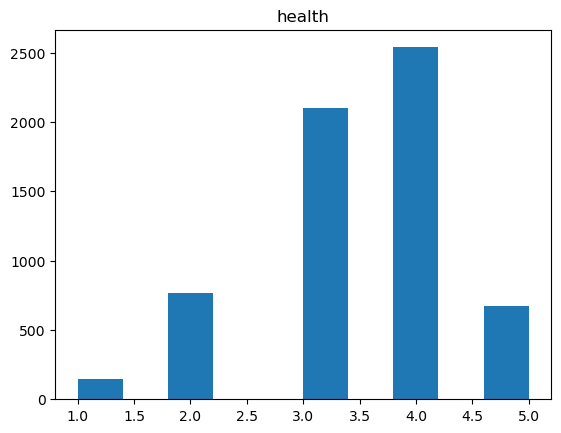

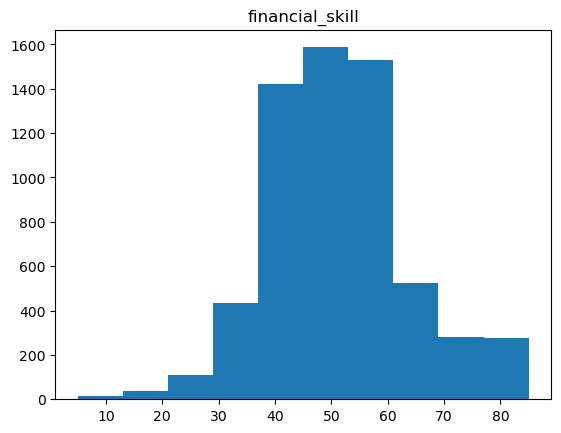

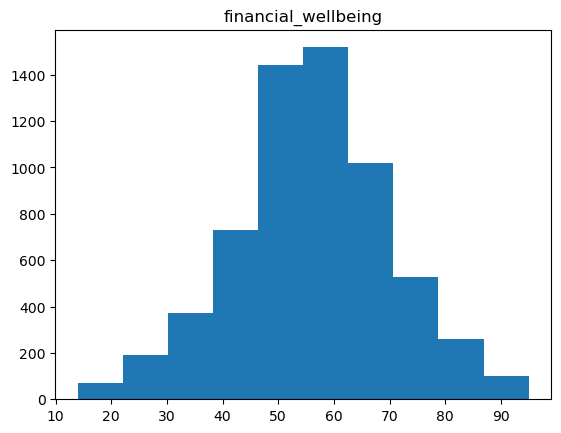

In [11]:
#Creating histograms
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()            
               

In [14]:
#Creating bar charts, rotating labels to fit them into image
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,
                df_cat[i].value_counts()).set_title(i)
    
    if i== 'education' or i == 'employment':
        plt.xticks(rotation=80)
    
    plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [15]:
#Creating dummy variables and adding to our original dataframe

df = pd.concat([df, pd.get_dummies(df['employment'])], axis=1) 

df = pd.concat([df, pd.get_dummies(df['education'])], axis=1)

#Checking new dataframe
df.head()

,income,employment,financial_wellbeing,financial_skill,education,health,savings_account,life_insurance,health_insurance,retirement_account,...,Retired,Self-employed,Unemployed or temporarily laid off,Work full-time for an employer or the military,Work part-time for an employer or the military,Bachelors degree,Graduate/professional degree,High school degree/GED,Less than high school,Some college/Associate
0,87500,Retired,55,44,Bachelors degree,2,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
1,67500,Work full-time for an employer or the military,51,43,High school degree/GED,3,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,67500,Work full-time for an employer or the military,49,42,Some college/Associate,3,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
4,87500,Work full-time for an employer or the military,49,42,High school degree/GED,3,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
5,87500,Work full-time for an employer or the military,67,57,Bachelors degree,5,1,1,1,1,...,0,0,0,1,0,1,0,0,0,0


In [16]:
#Creating pivot tables to get an initial understanding of the impact of financial products

df_products = df[['savings_account','life_insurance','health_insurance','retirement_account','pension','investment','education_saving','student_loan']]

for i in df_products.columns:
    table = pd.pivot_table(df, values=['financial_wellbeing'], index=[i],
                   aggfunc=[np.mean,np.median])
    table.loc['difference'] = np.abs(table.loc[0].sub(table.loc[1], fill_value=0))
    print(table)
    print()

                               mean              median
                financial_wellbeing financial_wellbeing
savings_account                                        
0                         48.716553                49.0
1                         57.360794                57.0
difference                 8.644241                 8.0

                              mean              median
               financial_wellbeing financial_wellbeing
life_insurance                                        
0                        53.602288                53.0
1                        58.451553                58.0
difference                4.849265                 5.0

                                mean              median
                 financial_wellbeing financial_wellbeing
health_insurance                                        
0                          51.194141                51.0
1                          58.055109                58.0
difference                  6.860968           

## Model Building

In [17]:
#Importing packages

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [19]:
#Running a univariate regression for each financial product

r_squared = []
for i in df_products.columns:
       
    X = df_products[i] 
    y = df['financial_wellbeing']
    X = sm.add_constant(X)
    est = sm.OLS(y, X).fit()
    
    r_squared.append(est.rsquared)
    
    print(est.summary())
    

                             OLS Regression Results                            
Dep. Variable:     financial_wellbeing   R-squared:                       0.046
Model:                             OLS   Adj. R-squared:                  0.046
Method:                  Least Squares   F-statistic:                     299.7
Date:                 Mon, 15 Jan 2024   Prob (F-statistic):           1.27e-65
Time:                         13:02:46   Log-Likelihood:                -25134.
No. Observations:                 6223   AIC:                         5.027e+04
Df Residuals:                     6221   BIC:                         5.029e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              48.7166      